## ML project for prediction of Electrical Equipment Details

“I built a regression model to predict electrical equipment load percentage using multiple ML algorithms. After preprocessing and encoding, I compared Linear Regression, Decision Tree, Random Forest, and SVR. Random Forest achieved the highest R² score. Feature importance analysis showed that voltage and current parameters had the highest impact on load.”

In [19]:
#Libraries
import os
import sys
import time
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

print("All libraries imported successfully!")

All libraries imported successfully!


In [20]:
# Loading the dataset

dataset=pd.read_csv('electrical_equipment.csv')

In [21]:
# Preprocessing the dataset
# Missing values
# Cleaning the dataset

dataset.head()
dataset.info()
dataset.describe()
dataset.isnull().sum()
dataset.dropna(inplace=True)
dataset.duplicated().sum()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   equipment_id           50000 non-null  str    
 1   asset_tag              50000 non-null  str    
 2   equipment_type         50000 non-null  str    
 3   category               50000 non-null  str    
 4   manufacturer           50000 non-null  str    
 5   manufacturing_year     50000 non-null  int64  
 6   rated_power_kw         50000 non-null  float64
 7   temperature_c          50000 non-null  float64
 8   vibration_mm_s         50000 non-null  float64
 9   load_percent           50000 non-null  float64
 10  failure_occurred       50000 non-null  int64  
 11  health_index           50000 non-null  float64
 12  technical_manual_text  50000 non-null  str    
 13  inspection_report      50000 non-null  str    
dtypes: float64(5), int64(2), str(7)
memory usage: 11.9 MB


np.int64(0)

In [22]:
# Columns in the dataset
dataset.columns

Index(['equipment_id', 'asset_tag', 'equipment_type', 'category',
       'manufacturer', 'manufacturing_year', 'rated_power_kw', 'temperature_c',
       'vibration_mm_s', 'load_percent', 'failure_occurred', 'health_index',
       'technical_manual_text', 'inspection_report'],
      dtype='str')

In [23]:
# Dataset
dataset

,equipment_id,asset_tag,equipment_type,category,manufacturer,manufacturing_year,rated_power_kw,temperature_c,vibration_mm_s,load_percent,failure_occurred,health_index,technical_manual_text,inspection_report
0,5b00acf6-0f86-4f80-a313-82febccce068,AT-0,Panel,HV,GE,2018,780.35,97.78,5.44,25.54,0,54.69,Operate within rated limits. Follow maintenanc...,Critical condition detected.
1,5b227d8f-5124-40a3-9f7c-a68db5f6d8e5,AT-1,Generator,MV,Schneider,2013,1903.89,69.56,4.98,66.86,0,55.80,Operate within rated limits. Follow maintenanc...,Normal condition.
2,f59fd625-3ba2-4322-a212-3de717dc2ab6,AT-2,UPS,MV,ABB,2018,1477.39,45.64,3.48,83.91,0,62.56,Operate within rated limits. Follow maintenanc...,Normal condition.
3,68edd00b-eb30-40ed-8e4d-6748c7dc79c3,AT-3,Panel,HV,ABB,2016,1217.38,88.93,4.69,81.16,0,47.70,Operate within rated limits. Follow maintenanc...,Normal condition.
4,206f009b-9575-464d-a4e0-8a2c97f4791e,AT-4,Generator,LV,Hitachi,2023,354.24,63.49,3.60,86.99,0,56.35,Operate within rated limits. Follow maintenanc...,High load observed.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,025a75d8-3548-4e37-8021-8492705bcfb2,AT-49995,Panel,MV,Siemens,2008,1263.77,93.38,2.45,69.77,0,53.12,Operate within rated limits. Follow maintenanc...,Critical condition detected.
49996,1410a4d5-b74f-4235-8177-6730a9c58bc0,AT-49996,UPS,LV,Siemens,2007,491.08,92.34,1.26,70.34,0,55.71,Operate within rated limits. Follow maintenanc...,Critical condition detected.
49997,e6b9f528-09bf-400e-b9d6-2922854f1655,AT-49997,Motor,MV,ABB,2012,1510.54,83.96,2.17,35.38,0,63.40,Operate within rated limits. Follow maintenanc...,Normal condition.
49998,d719c688-196a-431e-a030-4c1968edacbf,AT-49998,Motor,MV,ABB,2017,1065.97,69.96,2.47,72.25,0,59.62,Operate within rated limits. Follow maintenanc...,Normal condition.


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in dataset.select_dtypes(include='object').columns:
    dataset[col] = le.fit_transform(dataset[col])

C:\Windows\Temp\ipykernel_25240\199405690.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in dataset.select_dtypes(include='object').columns:


In [25]:
# Model Building
# Splitting the dataset into features and target variable
X = dataset.drop('manufacturing_year', axis=1)  # Replace 'target_variable' with the actual target column name
y = dataset['manufacturing_year']  # Replace 'target_variable' with the actual target column name
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
for col in dataset.select_dtypes(include='object').columns:
    print(col, dataset[col].nunique())

In [27]:
# Model Evaluation metrics
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 30.03965466699258
R^2 Score: -0.0006131533099891229


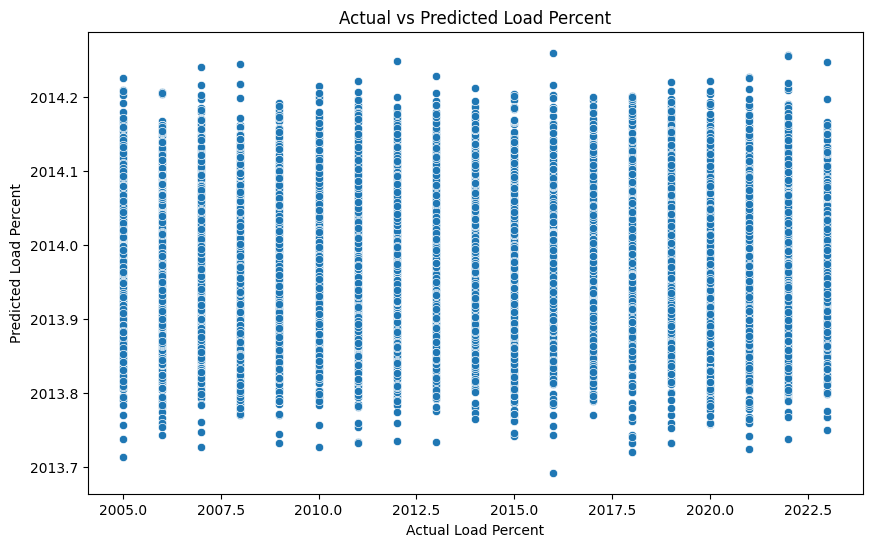

In [28]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Load Percent')
plt.ylabel('Predicted Load Percent')
plt.title('Actual vs Predicted Load Percent')
plt.show()

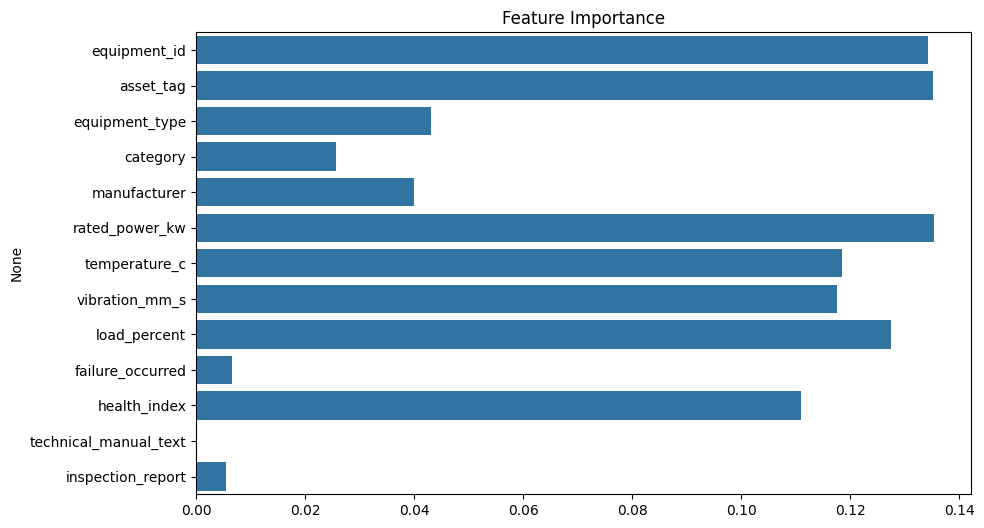

In [29]:
#  Random Forest Regressor for feature importance
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

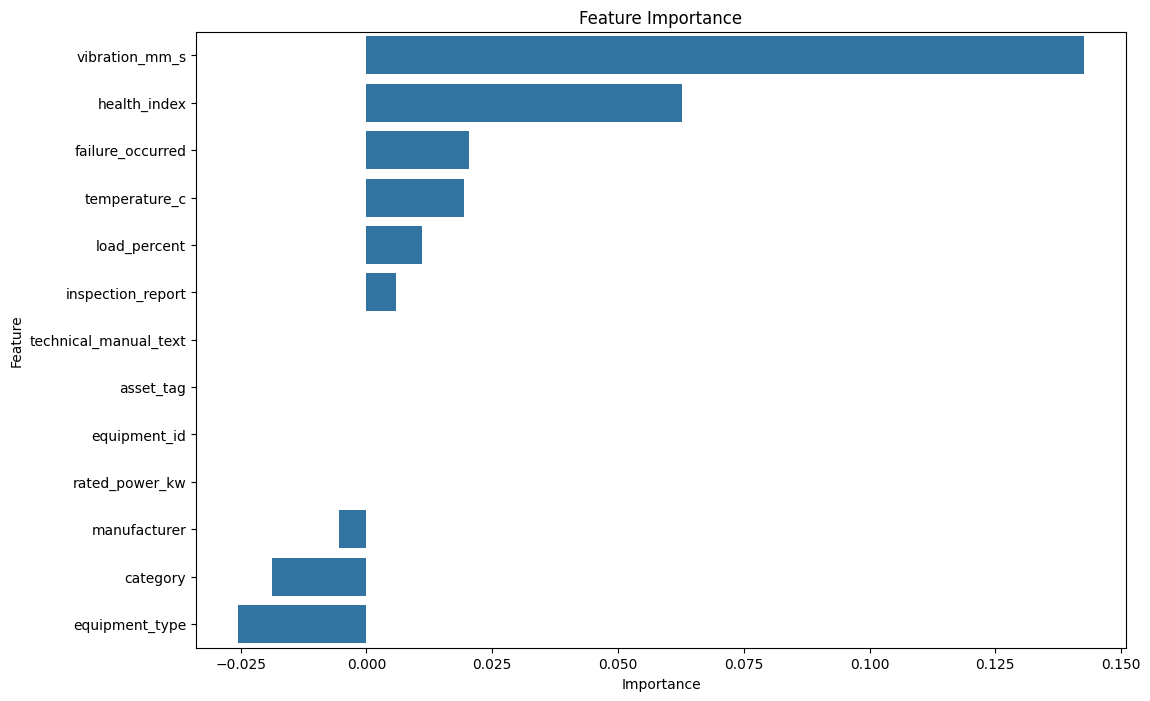

In [30]:
# Feature importance
feature_importance = model.coef_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [31]:
# To compare with other models
models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR()
}

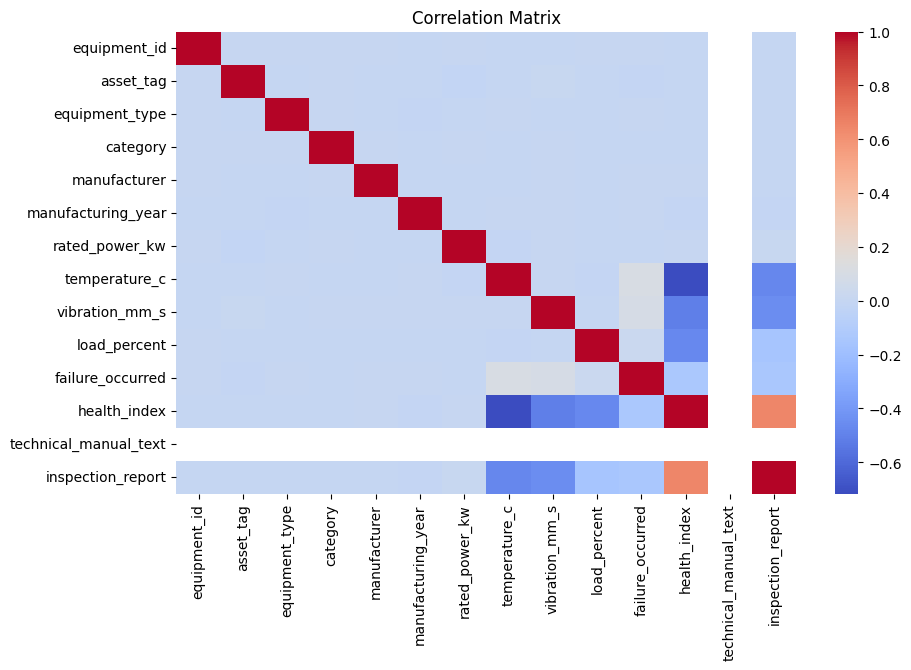

In [32]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [33]:
# Save model
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']